<a href="https://colab.research.google.com/github/Dkaattae/Car-Angle-Classifier/blob/main/test/Car_Angle_Classifier_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ln -s "/content/drive/MyDrive/MLZoomcamp_project" /content/dataset

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/dataset/labels_fixed.csv')
test_df = df[df['split']=='test']
test_list = test_df['image_id'].to_list()

To randomly select a specified number of unique elements from a list, you can use the `random.sample()` function. This function takes two arguments: the list you want to sample from, and the number of elements you want to pick.

In [6]:
import random

In [9]:
tests = random.sample(test_list, 5)
print(f"Randomly picked 5 image IDs from 'test_list': {tests}")

Randomly picked 5 image IDs from 'test_list': [201, 703, 936, 1412, 35]


In [12]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.6 MB/s eta 0:00:00


In [13]:
import os
from PIL import Image
import numpy as np
import onnxruntime as ort
from io import BytesIO
from urllib import request

In [14]:
def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

def preprocess_pytorch_style(X):
    # X: shape (1, 299, 299, 3), dtype=float32, values in [0, 255]
    X = X / 255.0

    mean = np.array([0.485, 0.456, 0.406]).reshape(1, 3, 1, 1)
    std = np.array([0.229, 0.224, 0.225]).reshape(1, 3, 1, 1)

    # Convert NHWC → NCHW
    # from (batch, height, width, channels) → (batch, channels, height, width)
    X = X.transpose(0, 3, 1, 2)

    # Normalize
    X = (X - mean) / std

    return X.astype(np.float32)

In [19]:
def predict(img, onnx_model_path):
    input_size = 224
    img = prepare_image(img, (input_size,input_size))

    X = np.array(img)
    X = np.expand_dims(X, axis=0)
    input_array = preprocess_pytorch_style(X)

    session = ort.InferenceSession(onnx_model_path, providers=["CPUExecutionProvider"])

    inputs = session.get_inputs()
    outputs = session.get_outputs()

    input_name = inputs[0].name
    output_name = outputs[0].name

    results = session.run([output_name], {input_name: input_array})
    predictions = results[0][0].tolist()
    return predictions

In [20]:
for test in tests:
  img = Image.open(f'dataset/raw/{test:06d}.jpg')
  predictions = predict(img, 'car_angle_classifier.onnx')
  print('test_id: ', test, ', predictions: ', predictions)


test_id:  201 , predictions:  [-2.0168206691741943, 4.878656387329102, -6.016444683074951]
test_id:  703 , predictions:  [-1.4673337936401367, 6.246615886688232, -9.48643684387207]
test_id:  936 , predictions:  [-4.788048267364502, 2.3659303188323975, 0.2628442049026489]
test_id:  1412 , predictions:  [-4.834342956542969, -0.5720323324203491, 4.456693649291992]
test_id:  35 , predictions:  [4.4031982421875, 0.6975314021110535, -7.751020908355713]


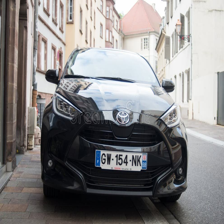

In [28]:
img = Image.open(f'dataset/raw/000035.jpg')
img.resize((224,224))